# Project Description.

<b>Problem Statement :</b>
A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service.

<b>Objective :</b>
* We are required to model the data relating to the various customer attributes and their response towards the marketting campaigns, and report the key-drivers of those responses.
* The predictive model will be used to predict the response of a new customer towards a marketting campaign, in order to do targetted marketting which would lead to a better response-ratio for the compaigns and hence will cut down unnecessary costs.

<b>Data source :</b>

* Kaggle : https://www.kaggle.com/rodsaldanha/arketing-campaign

# Importing libraries
Okay so prima facie, lets import some of the libraries we will be needing for this project.
(even if we are missing out on some library, we can always import it later on in the project.)

In [49]:
import sys

# library to handle vectorized data 
import numpy as np 
# library for data analsysis and manupulation
import pandas as pd 
# so that the output is not trunacated by pandas when we actually want to see it 
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 1000)

# for visualisations
import seaborn as sns

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

# Loading the data.

In [50]:
data = pd.read_csv('marketing_campaign.csv')
print('The dimension of our data is :',data.shape)

The dimension of our data is : (2240, 29)


In [51]:
# let's have a look at the features and the corresponding data types of those features\n",
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [52]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Exploratory data analysis.
## And data cleaning if required.

### Feature : ' ID '

In [53]:
data['ID'].value_counts().index.sort_values(ascending=True)

Int64Index([    0,     1,     9,    13,    17,    20,    22,    24,    25,
               35,
            ...
            11133, 11148, 11166, 11171, 11176, 11178, 11181, 11187, 11188,
            11191],
           dtype='int64', length=2240)

Okay so we can see that the feature ID represents the customer IDs of the various customers over a period of time, but the data does not reflect a consecutive collection of data from all the customers, which is why the length of our data is no inline with the range of the customer IDs in this feature.  
Due to the fact mentoined above, the feature is distorting the data a bit, so we will be dropping the feature from our data as it is not adding any value to our data and hence not required for our analysis.

In [54]:
data.drop('ID', axis=1, inplace=True)

### Feature : ' Year_Birth '

In [55]:
data['Year_Birth'].value_counts().index.sort_values(ascending=True)

Int64Index([1893, 1899, 1900, 1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948,
            1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
            1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996],
           dtype='int64')

Okay so from above we can observe the the feature 'Year_Birth' represents the different years of birth of the customers. The data collected contains some gaps in this feature; in terms of particular years in which customers were born. So our data does not contain all the years starting from 1893 to 1996.

### Feature : ' Education '

In [56]:
data['Education'].value_counts().index.sort_values(ascending=True)

Index(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype='object')

We can see that there are  classes in this feature, but there are 2 among them which mean the same but are represented in two different ways; i.e. '2n Cycle' and 'Master'. So we will replace all occurances of he class'2n Cycle' with 'Master', for a better value representation.

In [57]:
data['Education'] = data["Education"].replace('2n Cycle', "Master")

### Feature : ' Marital_Status '

In [58]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

okay so this feature has 8 classes inour data, for the purpose of a better value representation in this feature, we will be doing the following transformations to some of the classes :
* 'Together' > replaced by 'live_in',
* 'Alone', 'YOLO' and 'Absurd' > replaced by 'single' .

In [59]:
data['Marital_Status'] = data['Marital_Status'].replace('Together', 'Live_in')
data['Marital_Status'] = data['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Single')

### Feature : ' Dt_Customer '

In [60]:
data['Dt_Customer'].value_counts().index.sort_values(ascending=True)

Index(['2012-07-30', '2012-07-31', '2012-08-01', '2012-08-02', '2012-08-03',
       '2012-08-04', '2012-08-05', '2012-08-06', '2012-08-07', '2012-08-08',
       ...
       '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23', '2014-06-24',
       '2014-06-25', '2014-06-26', '2014-06-27', '2014-06-28', '2014-06-29'],
      dtype='object', length=663)

The feature Dt_Customer represents dates of customer’s enrolment with the company. The data in this feature is represented in type str. In order to improve the value representation of this feture, and to do meaningful feature engineering with this feature, we will be converting the values in this feaure to data type datetime.

In [61]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format="%Y-%m-%d")

In [62]:
data['Dt_Customer'].value_counts().index.sort_values(ascending=True)

DatetimeIndex(['2012-07-30', '2012-07-31', '2012-08-01', '2012-08-02',
               '2012-08-03', '2012-08-04', '2012-08-05', '2012-08-06',
               '2012-08-07', '2012-08-08',
               ...
               '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23',
               '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27',
               '2014-06-28', '2014-06-29'],
              dtype='datetime64[ns]', length=663, freq=None)

As we can see that the data type has been converted into datetime64[ns], without effecting the data itself.

# Descriptive analysis.

In [63]:
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


As we can see from above the numerical features are on very different scales with respect to each other, this tells us that we will need to scale the numerical features in the future before using for modelling the data.

In [64]:
data.corr()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Year_Birth,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331
MntSweetProducts,-0.018133,0.440744,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,...,-0.423294,0.001530,0.028641,0.259590,0.241818,0.009985,-0.022485,NaN,NaN,0.117372


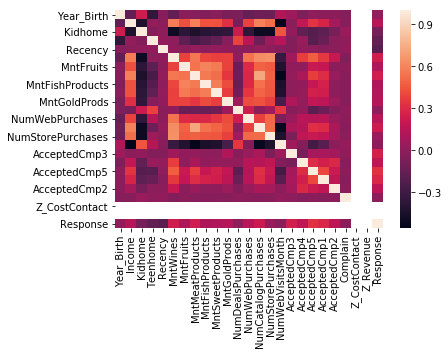

In [65]:
# Visualization of the correlation between the features.
corr_matrix = data.corr()
sns.heatmap(corr_matrix)

# Handling missing-values.

In [66]:
# Let's check for missing values in our data
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

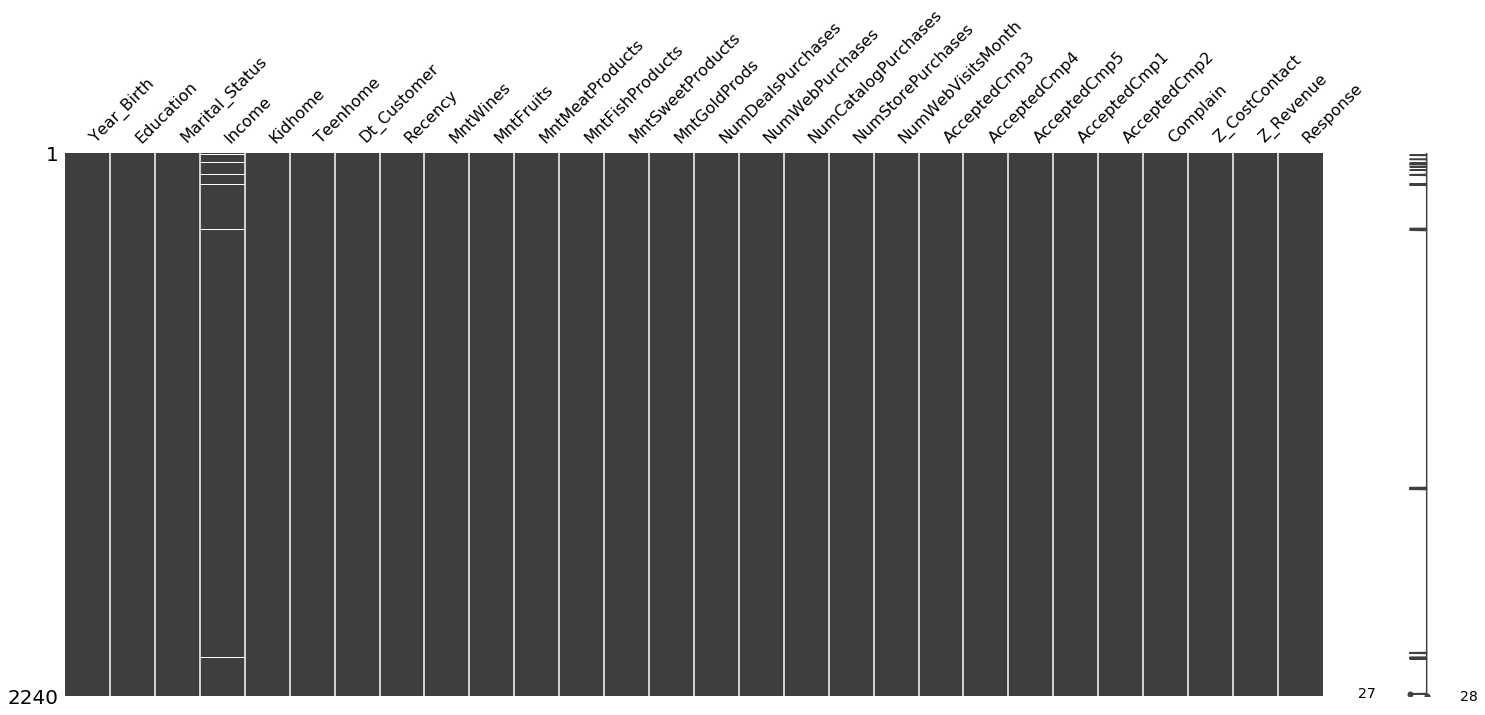

In [67]:
# Let's visualize the fragmentation of the data feature-wise due to the presence of the missing values.
import missingno as msno
msno.matrix(data)

We can see that the data is fairly oh high quality due to the fact that very less number of missing values are present in the data.  
Given that, we do see 24 missing values in the feature 'Income'. The best ways to impute the missing values in this feature, is strategies which utilise relative imputation strategies.  
For exampe we can use the mode of the feature for imputation purposes of the missing values in this feature if we assume that the data is a high degree representation of the bigger population, which means that any new data point will be in line with the distribution of the data we have.  
Otherwise, we can use the **sklearn.impute.KNNImputer** for imputation purposes of the missing values in this feature, which utilises the K-nearest-neighbors algorithm to figure out the value with highest probality, and uses it for imputation.  
Because of the fact we cannot be sure of how representative our data is of the larger population, we will be using KNNImputer in this case.

In [68]:
# let's check the range of the feature Income
data['Income'].max() - data['Income'].min()

664936.0

In [69]:
from sklearn.impute import KNNImputer
data['Income'] = KNNImputer(n_neighbors=4).fit_transform(data['Income'].values.reshape(-1,1))

In [70]:
data['Income'].isnull().sum()

0

# Outliers detection and removal.

Outlier detection using the TuKey test. 

In [71]:
from Outliers import Outlier_detector_and_remover
print(Outlier_detector_and_remover.__doc__)


	This is a class for detecting and removal of utliers in a feature of a dataframe.

	Availaible methods for this class are as follows :

		* 'TUKEY_outlier_detector' >> Detection of outliers in a feature of a dataframe, utilising IQR.
		* 'TUKEY_outlier_remover' >> Removal of outliers in a feature of a dataframe, utilising IQR.

	Class parameters are as follows :
		* dataframe - name of the dataframe of the data in use.
		* feature - name of the feature in the dataframe, to detect and manage the outliers.
	


In [74]:
# selecting the numerical features from our dataset
num_features = data.select_dtypes(include=['float64', 'int64'])

for col in num_features.columns : 
    print('------------Outlier detection report for the feature > {}-------------"'.format(col))
    Outlier_detector_and_remover(data, col, 'detection').operate()

------------Outlier detection report for the feature > Year_Birth-------------"
interquartile range: 18.0
upper_inner_fence: 2004.0
lower_inner_fence: 1932.0
upper_outer_fence: 2031.0
lower_outer_fence: 1905.0
percentage of records out of inner fences for Year_Birth is: 0.13
percentage of records out of outer fences for Year_Birth is: 0.13
------------Outlier detection report for the feature > Income-------------"
interquartile range: 32751.0
upper_inner_fence: 117416.25
lower_inner_fence: -13587.75
upper_outer_fence: 166542.75
lower_outer_fence: -62714.25
percentage of records out of inner fences for Income is: 0.36
percentage of records out of outer fences for Income is: 0.04
------------Outlier detection report for the feature > Kidhome-------------"
interquartile range: 1.0
upper_inner_fence: 2.5
lower_inner_fence: -1.5
upper_outer_fence: 4.0
lower_outer_fence: -3.0
percentage of records out of inner fences for Kidhome is: 0.00
percentage of records out of outer fences for Kidhome 

We can confirm from the above test, that outliers are present in our dataset.  
Let's move forward removal of the ouliers using Tukey test.

 Mean and standard deviation of the features, before removing outliers, for aiding the analysis of the presence and absence of outliers in our data.

In [112]:
outliers_effect = pd.DataFrame(data.describe().iloc[1:3, :]).rename(index={'mean':'initial_mean', 'std':'initial_SD'})
outliers_effect = outliers_effect.T
outliers_effect

,initial_mean,initial_SD
Year_Birth,1968.805804,11.984069
Income,52247.251354,25037.797168
Kidhome,0.444196,0.538398
Teenhome,0.506250,0.544538
Recency,49.109375,28.962453
MntWines,303.935714,336.597393
MntFruits,26.302232,39.773434
MntMeatProducts,166.950000,225.715373
MntFishProducts,37.525446,54.628979
MntSweetProducts,27.062946,41.280498


In [114]:
'''due to the fact that the size of our data is significantly less,
we will be rewmoving outliers from the 'outer' fence,
according t the TUKEY outliers test'''
for col in num_features.columns : 
    print('------------Outlier removal report for the feature "{}" from outer fence-------------'.format(col))
    data = Outlier_detector_and_remover(data, col, 'removal').operate()

------------Outlier removal report for the feature "Year_Birth" from outer fence-------------
State the fence type to remove outliers relative to it :outer
length of input dataframe: 2240
length of new dataframe after outlier removal: 2237
------------Outlier removal report for the feature "Income" from outer fence-------------
State the fence type to remove outliers relative to it :outer
length of input dataframe: 2237
length of new dataframe after outlier removal: 2236
------------Outlier removal report for the feature "Kidhome" from outer fence-------------
State the fence type to remove outliers relative to it :outer
length of input dataframe: 2236
length of new dataframe after outlier removal: 2236
------------Outlier removal report for the feature "Teenhome" from outer fence-------------
State the fence type to remove outliers relative to it :outer
length of input dataframe: 2236
length of new dataframe after outlier removal: 2236
------------Outlier removal report for the featur

We can see the effect of removing the outliers from our data in terms of the mean and SD of the features before and after removal of the outliers.

In [118]:
outliers_effect["mean_after_outlier_removal"] = data.describe().iloc[1,:]
outliers_effect["SD_after_outlier_removal"] = data.describe().iloc[2,:]
outliers_effect

,initial_mean,initial_SD,mean_after_outlier_removal,SD_after_outlier_removal
Year_Birth,1968.805804,11.984069,1969.270015,11.329239
Income,52247.251354,25037.797168,45032.039683,18489.360099
Kidhome,0.444196,0.538398,0.564774,0.555536
Teenhome,0.506250,0.544538,0.562591,0.541179
Recency,49.109375,28.962453,50.791121,28.537310
MntWines,303.935714,336.597393,182.118632,241.903335
MntFruits,26.302232,39.773434,14.006550,22.539743
MntMeatProducts,166.950000,225.715373,85.382096,128.243028
MntFishProducts,37.525446,54.628979,19.374818,29.268030
MntSweetProducts,27.062946,41.280498,12.860262,19.054703


# Data analysis utilising visualizations.

# Feature engineering.

# Splitting the data for testing.

# Feature Scalling.

# Hyper-parameter optimization of models.

# Model validation.

# Final prediction.

# Saving the best model.